In [1]:
import Functions as func
import SimModel
import matplotlib.pyplot as plt

In [2]:
datafcr, dataafrr, datamfrr, datalastprofile, pvdata, pricedata = func.getdata('09-10','09-20')
model = SimModel.Model(datalastprofile, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], pvdata, 6, 5, 100)

In [3]:
model.logdata

,chargecapacity,netenergydemand,drawfromgrid,feedingrid,chargecapacityusedbypv
timestamp,,,,,
2014-09-10 00:00:00,0,0.778950,NaN,NaN,0
2014-09-10 00:15:00,0,0.665083,NaN,NaN,0
2014-09-10 00:30:00,0,0.639050,NaN,NaN,0
2014-09-10 00:45:00,0,0.574850,NaN,NaN,0
2014-09-10 01:00:00,0,0.508000,NaN,NaN,0
...,...,...,...,...,...
2014-09-19 22:45:00,0,1.445650,NaN,NaN,0
2014-09-19 23:00:00,0,1.952850,NaN,NaN,0
2014-09-19 23:15:00,0,1.696383,NaN,NaN,0


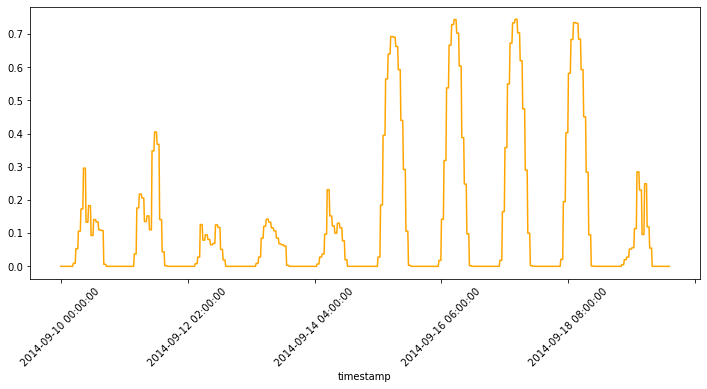

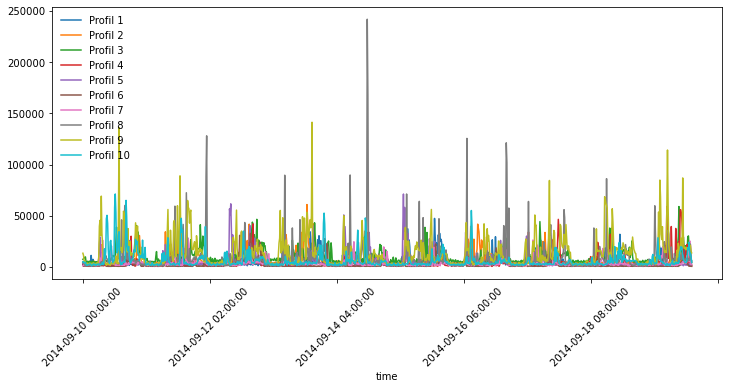

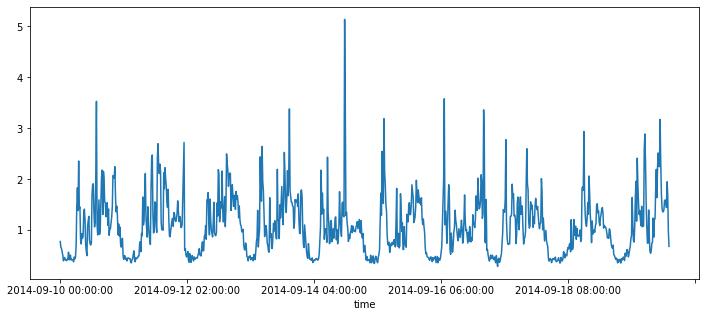

In [4]:
func.plotpvdata(pvdata)
func.plotlastprofiledata(datalastprofile, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(12, 5))
datalastprofile['Summe'].plot()

In [5]:
model.run()

Text(0, 0.5, 'Charge Capacity')

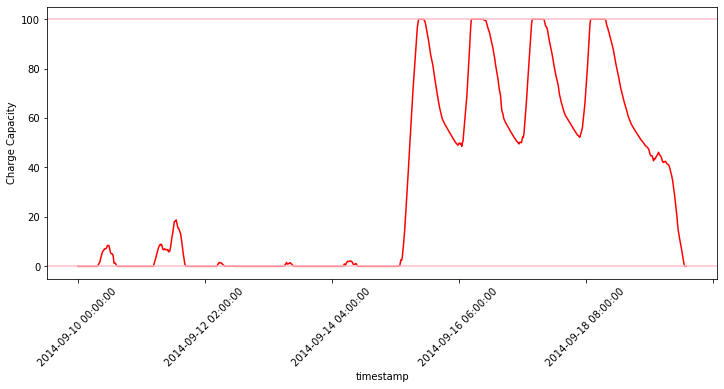

In [6]:
plt.figure(figsize=(12, 5))
model.logdata['chargecapacity'].plot(color="red")
plt.axhline(y=0, color='pink')
plt.axhline(y=model.capacityofenergystorage, color='pink')
plt.xticks(rotation=45)
plt.ylabel('Charge Capacity')

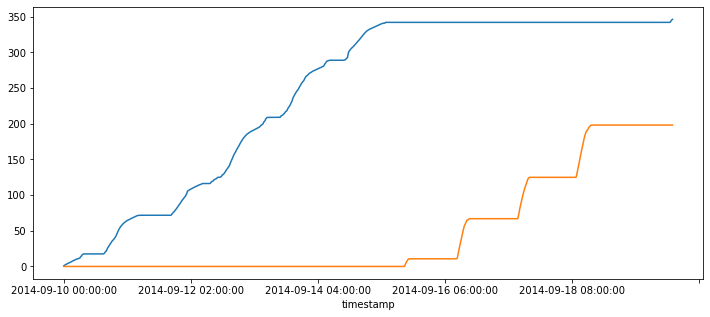

In [7]:
plt.figure(figsize=(12, 5))
cumsumdatadraw = model.logdata['drawfromgrid'].cumsum()
cumsumdatafeed = model.logdata['feedingrid'].cumsum()
cumsumdatadraw.plot()
cumsumdatafeed.plot()

In [8]:
model.logdata.to_csv('test.csv')